# Bayesian Networks Fundamentals

In [1]:
from src.graph_independence import GraphIndependence
from src.graph_independence import DirectedGraphIndependence
from src.probability_distribution import ProbabilityDistribution, find_undirected_imaps, plot_undirected_imaps, find_directed_imaps, plot_directed_imaps
from src.bayesian_network import BayesianNetwork, ConditionalProbabilityTable
import networkx as nx
import matplotlib.pyplot as plt

## Exercise 1.1

Let G be an undirected graph containing five nodes and the following links: A–B, A–C, A–D, C–D, B–E, C–E, and D–E.

1. For each of the following relationships, say whether it is true or false, listing all the paths between the first two variables and pointing out which are active and which are blocked.

a) IG(A, B)  
b) IG(A, D)  
c) IG(B, C)  
d) IG(C, D)  
e) IG(A, E)  
f) IG(B, C|A)  
g) IG(B, D|C)  
h) IG(B, C|A, E)  
i) IG(B, D|A, E)  
j) IG(A, E|B, C)  
k) IG(A, E|B, C, D)  
l) IG(B, C|A, D, E)


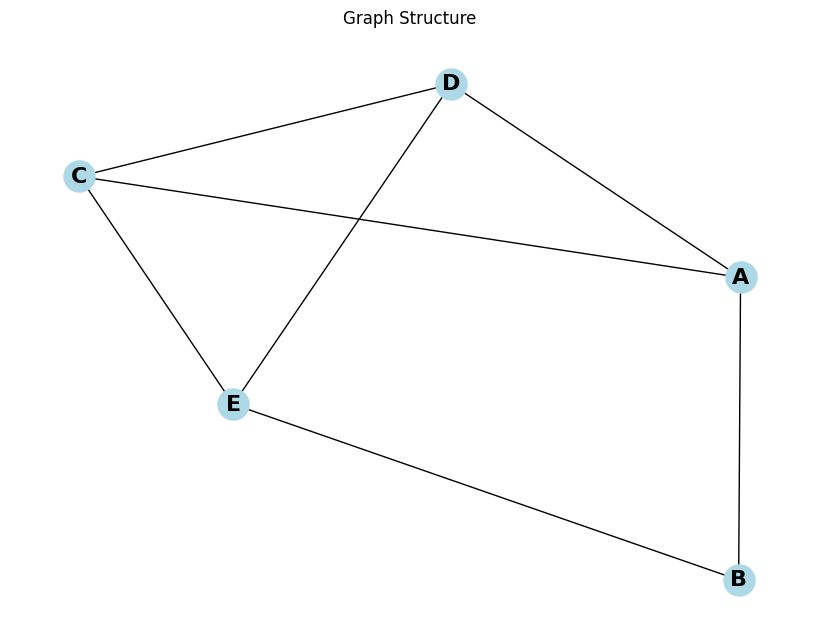

In [2]:
# Create a new graph
G = nx.Graph()

# Add nodes and edges
nodes = ['A', 'B', 'C', 'D', 'E']
edges = [
    ('A', 'B'), ('A', 'C'), ('A', 'D'),
    ('C', 'D'), ('B', 'E'), ('C', 'E'),
    ('D', 'E')
]
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16, font_weight='bold')
plt.title("Graph Structure")
plt.show()


In [3]:
# Initialize the graph
gi = GraphIndependence(nodes, edges)

# Define all relationships to check
relationships = [
    ('A', 'B', None),
    ('A', 'D', None),
    ('B', 'C', None),
    ('C', 'D', None),
    ('A', 'E', None),
    ('B', 'C', {'A'}),
    ('B', 'D', {'C'}),
    ('B', 'C', {'A', 'E'}),
    ('B', 'D', {'A', 'E'}),
    ('A', 'E', {'B', 'C'}),
    ('A', 'E', {'B', 'C', 'D'}),
    ('B', 'C', {'A', 'D', 'E'})
]

# Analyze each relationship
for X, Y, observed in relationships:
    print(gi.analyze_relationship(X, Y, observed))
    print("-" * 50)


IG(A, B): False
Paths:
- A -> B: Active
- A -> C -> D -> E -> B: Blocked
- A -> C -> E -> B: Blocked
- A -> D -> C -> E -> B: Blocked
- A -> D -> E -> B: Blocked

--------------------------------------------------
IG(A, D): False
Paths:
- A -> B -> E -> C -> D: Blocked
- A -> B -> E -> D: Blocked
- A -> C -> D: Blocked
- A -> C -> E -> D: Blocked
- A -> D: Active

--------------------------------------------------
IG(B, C): True
Paths:
- B -> A -> C: Blocked
- B -> A -> D -> C: Blocked
- B -> A -> D -> E -> C: Blocked
- B -> E -> C: Blocked
- B -> E -> D -> A -> C: Blocked
- B -> E -> D -> C: Blocked

--------------------------------------------------
IG(C, D): False
Paths:
- C -> A -> B -> E -> D: Blocked
- C -> A -> D: Blocked
- C -> D: Active
- C -> E -> B -> A -> D: Blocked
- C -> E -> D: Blocked

--------------------------------------------------
IG(A, E): True
Paths:
- A -> B -> E: Blocked
- A -> C -> D -> E: Blocked
- A -> C -> E: Blocked
- A -> D -> C -> E: Blocked
- A -> D -> 

## Exercise 1.2

Let G be a directed graph containing 7 nodes with the following edges:
- A → C
- B → C
- B → D
- C → E
- C → F
- D → F
- E → G
- F → G





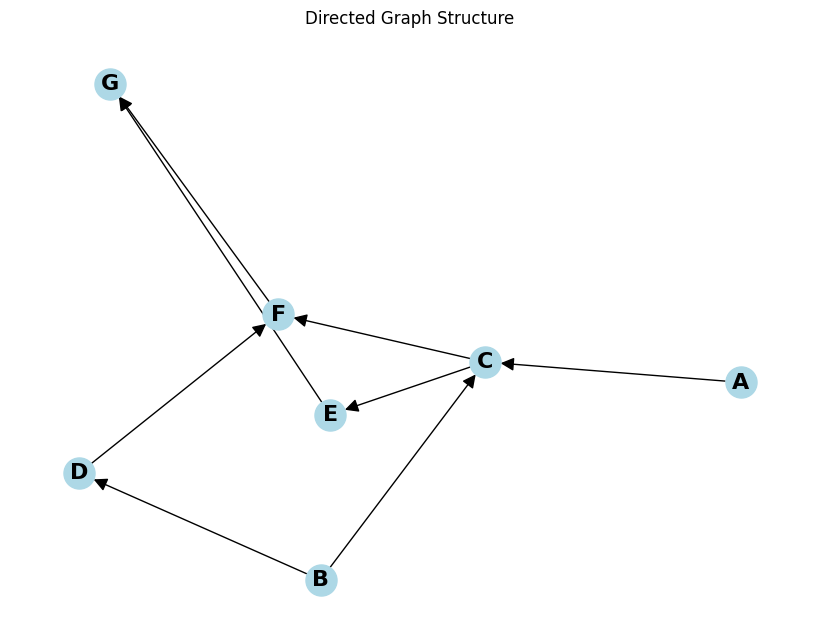

In [4]:
# Define the graph structure
nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
edges = [
    ('A', 'C'), ('B', 'C'), ('B', 'D'),
    ('C', 'E'), ('C', 'F'), ('D', 'F'),
    ('E', 'G'), ('F', 'G')
]

# Create and draw the directed graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='lightblue',
        node_size=500, font_size=16, font_weight='bold',
        arrows=True, arrowsize=20)
plt.title("Directed Graph Structure")
plt.show()

*Part 1*

For each of the following relationships, determine whether it is true or false. List all paths between the first two variables and identify which are active and which are blocked.

a) IG(A, B)  
b) IG(A, C)  
c) IG(A, D)  
d) IG(A, E)  
e) IG(A, G)  
f) IG(D, E)  
g) GI(C, G)

In [5]:
# Initialize the directed graph
dgi = DirectedGraphIndependence(nodes, edges)

# Part 1: Unconditional independence relationships
print("Part 1: Unconditional Independence Relationships")
print("=" * 50)

relationships_part1 = [
    ('A', 'B', None),   # a)
    ('A', 'C', None),   # b)
    ('A', 'D', None),   # c)
    ('A', 'E', None),   # d)
    ('A', 'G', None),   # e)
    ('D', 'E', None),   # f)
    ('C', 'G', None)    # g)
]

for X, Y, observed in relationships_part1:
    print(dgi.analyze_relationship(X, Y, observed))
    print()

Part 1: Unconditional Independence Relationships
IG(A, B): True
Paths:
• A → C → E → G ← F ← D ← B: Blocked (G is a collider)
• A → C ← B: Blocked (C is a collider)
• A → C → F ← D ← B: Blocked (F is a collider)
Conclusion: All paths are blocked.

IG(A, C): False
Paths:
• A → C: Active
Conclusion: Active path exists.

IG(A, D): True
Paths:
• A → C → E → G ← F ← D: Blocked (G is a collider)
• A → C ← B → D: Blocked (C is a collider)
• A → C → F ← D: Blocked (F is a collider)
Conclusion: All paths are blocked.

IG(A, E): False
Paths:
• A → C → E: Active (C is not conditioned on)
• A → C ← B → D → F → G ← E: Blocked (C is a collider)
• A → C → F → G ← E: Blocked (G is a collider)
Conclusion: Active path exists.

IG(A, G): False
Paths:
• A → C → E → G: Active (C is not conditioned on)
• A → C ← B → D → F → G: Blocked (C is a collider)
• A → C → F → G: Active (C is not conditioned on)
Conclusion: Active path exists.

IG(D, E): True
Paths:
• D ← B → C → E: Blocked (B is a collider)
• D ← B →


*Part 2*

For each of the following relationships, determine whether it is true or false. List all paths between the first two variables and indicate for each whether it is active, inactive, or blocked.

a) IG(A, B|C)  
b) IG(A, B|E)  
c) IG(A, B|F)  
d) IG(A, B|G)  
e) IG(A, D|C)  
f) IG(A, D|E)  
g) IG(A, F|C)  
h) IG(A, F|E)  
i) IG(A, F|G)  
j) IG(A, E|F)  
k) IG(B, E|C, D)  
l) IG(B, G|D, E)  
m) IG(D, E|C, G)  
n) IG(B, F|A, D, G)

In [6]:
# Part 2: Conditional independence relationships
print("\nPart 2: Conditional Independence Relationships")
print()

relationships_part2 = [
    ('A', 'B', {'C'}),           # a)
    ('A', 'B', {'E'}),           # b)
    ('A', 'B', {'F'}),           # c)
    ('A', 'B', {'G'}),           # d)
    ('A', 'D', {'C'}),           # e)
    ('A', 'D', {'E'}),           # f)
    ('A', 'F', {'C'}),           # g)
    ('A', 'F', {'E'}),           # h)
    ('A', 'F', {'G'}),           # i)
    ('A', 'E', {'F'}),           # j)
    ('B', 'E', {'C', 'D'}),      # k)
    ('B', 'G', {'D', 'E'}),      # l)
    ('D', 'E', {'C', 'G'}),      # m)
    ('B', 'F', {'A', 'D', 'G'})  # n)
]

for X, Y, observed in relationships_part2:
    print(dgi.analyze_relationship(X, Y, observed))
    print()


Part 2: Conditional Independence Relationships

IG(A, B|C): False
Paths:
• A → C → E → G ← F ← D ← B: Blocked (C is conditioned on)
• A → C ← B: Active (C is an observed collider)
• A → C → F ← D ← B: Blocked (C is conditioned on)
Conclusion: Active path exists.

IG(A, B|E): True
Paths:
• A → C → E → G ← F ← D ← B: Blocked (E is conditioned on)
• A → C ← B: Blocked (C is a collider)
• A → C → F ← D ← B: Blocked (F is a collider)
Conclusion: All paths are blocked.

IG(A, B|F): False
Paths:
• A → C → E → G ← F ← D ← B: Blocked (G is a collider)
• A → C ← B: Blocked (C is a collider)
• A → C → F ← D ← B: Active (C is not conditioned on)
Conclusion: Active path exists.

IG(A, B|G): False
Paths:
• A → C → E → G ← F ← D ← B: Active (C is not conditioned on)
• A → C ← B: Blocked (C is a collider)
• A → C → F ← D ← B: Blocked (F is a collider)
Conclusion: Active path exists.

IG(A, D|C): True
Paths:
• A → C → E → G ← F ← D: Blocked (C is conditioned on)
• A → C ← B → D: Blocked (B is a collid

## Execise 1.3

# Exercise 1.3

The probability distribution P is given by the following table:

| a  | b  | c  | P(a,b,c) |
|----|----|----|----------|
| +a | +b | +c | 0.112    |
| +a | +b | ¬c | 0.048    |
| +a | ¬b | +c | 0.064    |
| +a | ¬b | ¬c | 0.576    |
| ¬a | +b | +c | 0.056    |
| ¬a | +b | ¬c | 0.024    |
| ¬a | ¬b | +c | 0.012    |
| ¬a | ¬b | ¬c | 0.108    |

1. Point out which of these relationships are true and which are false. Note that, as stated on page 32 of [1], IP(X,Y) means that X and Y are independent variables (cf. Def. 1.19 of [1]) and IP(X,Y|Z) means that they are independent given Z (cf. Def. 1.22). For the first and fifth, indicate in detail the calculations you have made.

   a) IP(A,B)  
   b) IP(A,C)  
   c) IP(B,C)  
   d) IP(B,C|A)  
   e) IP(A,C|B)  
   f) IP(A,B|C)


In [7]:
# Create the probability distribution from the given table
probs = {
    (True, True, True): 0.112,
    (True, True, False): 0.048,
    (True, False, True): 0.064,
    (True, False, False): 0.576,
    (False, True, True): 0.056,
    (False, True, False): 0.024,
    (False, False, True): 0.012,
    (False, False, False): 0.108
}

P = ProbabilityDistribution(probs)

# Part 1: Check independence relationships
print("Part 1: Independence Relationships")
independence_relationships = {
    "IP(A,B)": P.check_independence('A', 'B'),
    "IP(A,C)": P.check_independence('A', 'C'),
    "IP(B,C)": P.check_independence('B', 'C'),
    "IP(B,C|A)": P.check_independence('B', 'C', 'A'),
    "IP(A,C|B)": P.check_independence('A', 'C', 'B'),
    "IP(A,B|C)": P.check_independence('A', 'B', 'C')
}
for rel, is_true in independence_relationships.items():
    print(f"{rel}: {is_true}")

# Print detailed calculations for (a) IP(A, B)
P.print_independence_calculation('A', 'B')

# Print detailed calculations for (e) IP(A, C|B)
P.print_conditional_independence_calculation('A', 'C', 'B')


Part 1: Independence Relationships
IP(A,B): False
IP(A,C): False
IP(B,C): False
IP(B,C|A): False
IP(A,C|B): True
IP(A,B|C): False

Calculations for IP(A, B):
P(A=True, B=True) = 0.160, P(A=True)*P(B=True) = 0.800*0.240 = 0.192
P(A=True, B=False) = 0.640, P(A=True)*P(B=False) = 0.800*0.760 = 0.608
P(A=False, B=True) = 0.080, P(A=False)*P(B=True) = 0.200*0.240 = 0.048
P(A=False, B=False) = 0.120, P(A=False)*P(B=False) = 0.200*0.760 = 0.152

Conclusion: A and B are NOT independent.

Calculations for IP(A, C|B):
P(A=True, C=True | B=True) = 0.467, P(A=True|B=True)*P(C=True|B=True) = 0.667*0.700 = 0.467
P(A=True, C=False | B=True) = 0.200, P(A=True|B=True)*P(C=False|B=True) = 0.667*0.300 = 0.200
P(A=False, C=True | B=True) = 0.233, P(A=False|B=True)*P(C=True|B=True) = 0.333*0.700 = 0.233
P(A=False, C=False | B=True) = 0.100, P(A=False|B=True)*P(C=False|B=True) = 0.333*0.300 = 0.100
P(A=True, C=True | B=False) = 0.084, P(A=True|B=False)*P(C=True|B=False) = 0.842*0.100 = 0.084
P(A=True, C=Fal


2. Draw all undirected graphs that are independence maps (I-maps) of P. Tip: The graph must have one node for each variable of P. Pay attention, because there are more graphs than one can think at first.


Part 2: Undirected I-maps
Found 1 undirected I-maps:
I-map 1: [('A', 'B'), ('A', 'C'), ('B', 'C')]


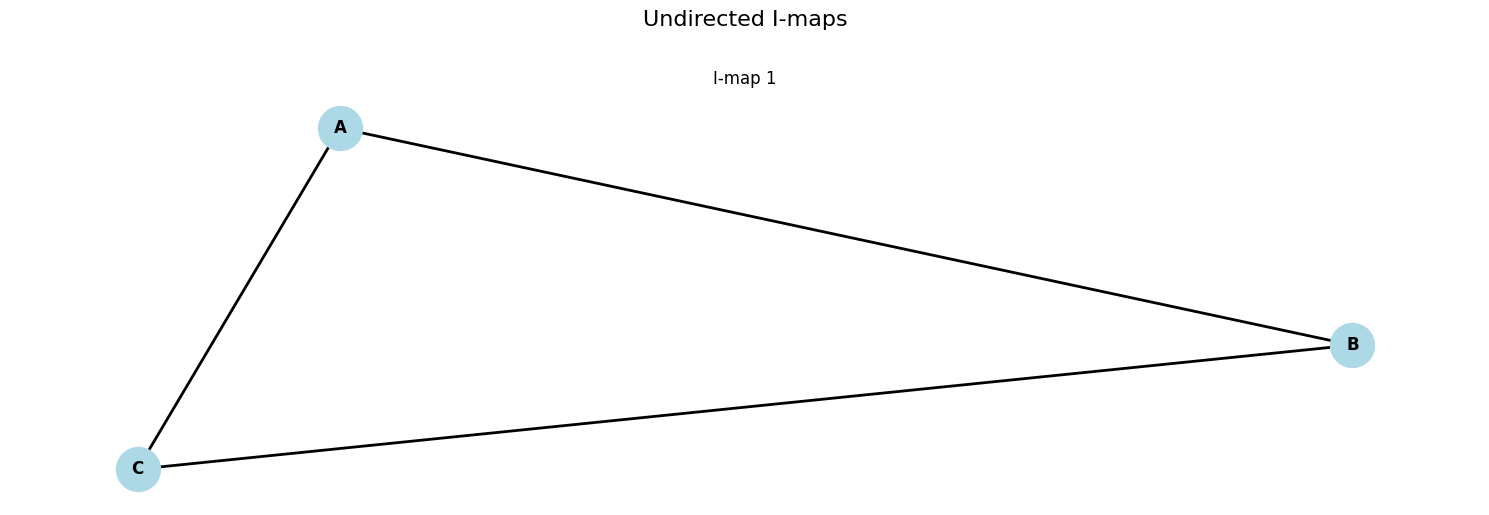

In [8]:
# Part 2: Find and plot undirected I-maps
print("\nPart 2: Undirected I-maps")
undirected_imaps = find_undirected_imaps(independence_relationships)
print(f"Found {len(undirected_imaps)} undirected I-maps:")
for i, edges in enumerate(undirected_imaps, 1):
    print(f"I-map {i}: {edges}")

# Plot all I-maps in a single figure
plot_undirected_imaps(undirected_imaps)

3. Draw all acyclic directed graphs that are independence maps (I-maps) of P.


Part 3: Directed Acyclic I-maps
Found 12 directed acyclic I-maps:
DAG I-map 1: [('B', 'A'), ('A', 'C')]
DAG I-map 2: [('A', 'B'), ('C', 'A')]
DAG I-map 3: [('A', 'B'), ('B', 'C')]
DAG I-map 4: [('A', 'B'), ('A', 'C'), ('B', 'C')]
DAG I-map 5: [('B', 'A'), ('A', 'C'), ('B', 'C')]
DAG I-map 6: [('C', 'A'), ('B', 'C')]
DAG I-map 7: [('B', 'A'), ('C', 'A'), ('B', 'C')]
DAG I-map 8: [('B', 'A'), ('C', 'B')]
DAG I-map 9: [('A', 'C'), ('C', 'B')]
DAG I-map 10: [('A', 'B'), ('A', 'C'), ('C', 'B')]
DAG I-map 11: [('A', 'B'), ('C', 'A'), ('C', 'B')]
DAG I-map 12: [('B', 'A'), ('C', 'A'), ('C', 'B')]


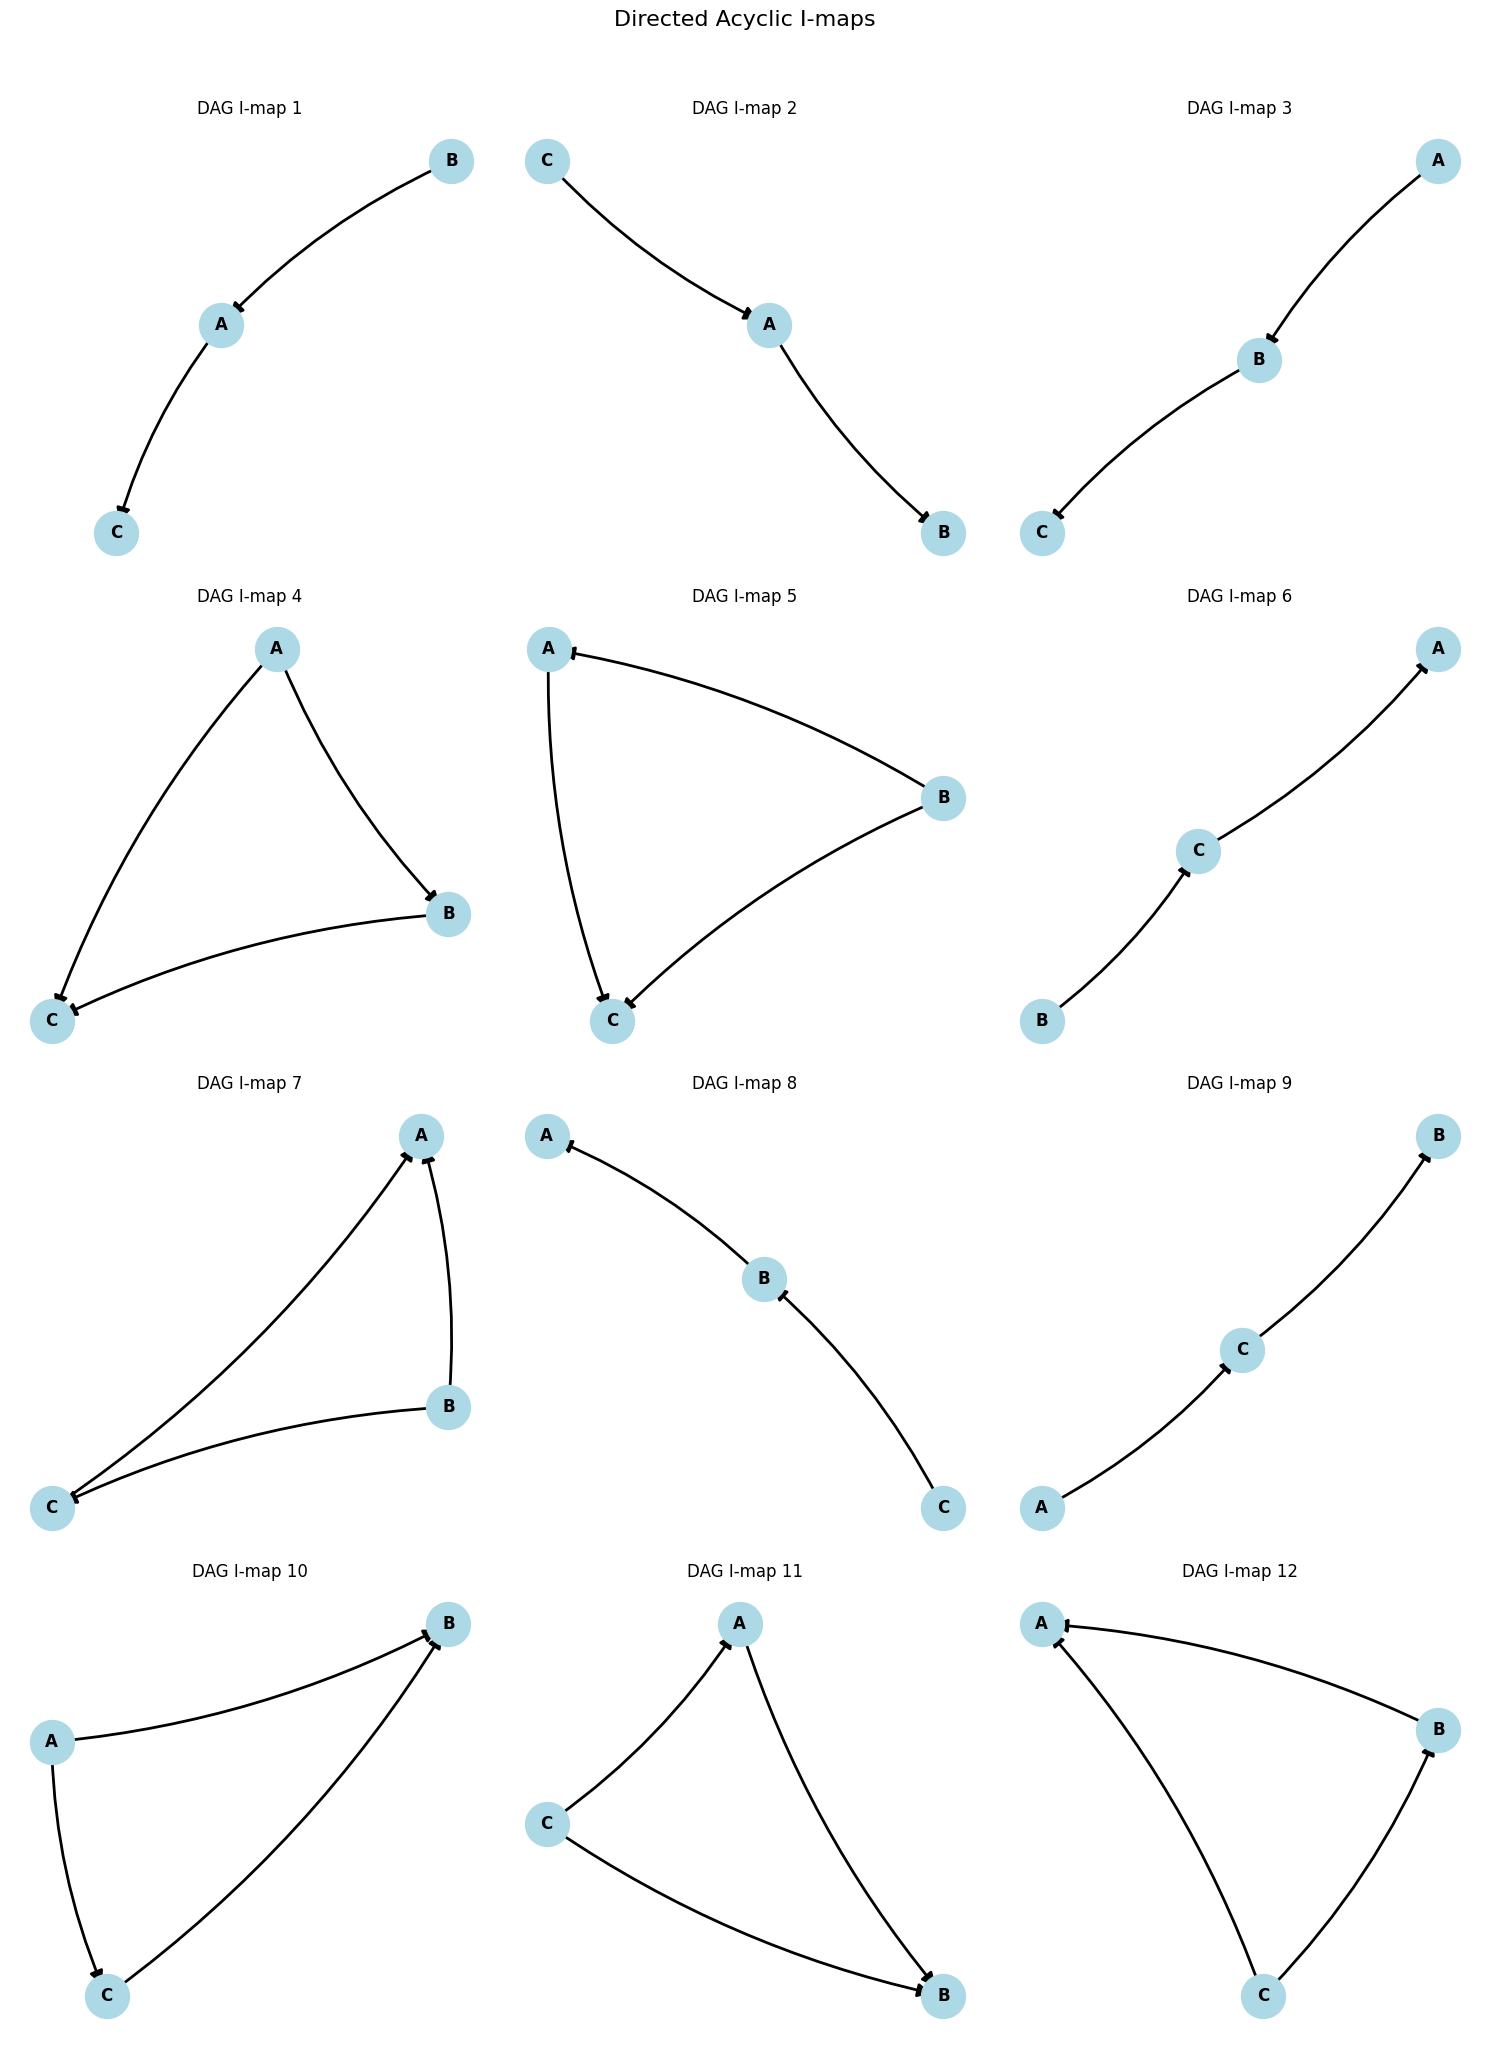

In [9]:
# Part 3: Find and plot directed acyclic I-maps
print("\nPart 3: Directed Acyclic I-maps")
directed_imaps = find_directed_imaps(independence_relationships)
print(f"Found {len(directed_imaps)} directed acyclic I-maps:")
for i, edges in enumerate(directed_imaps, 1):
    print(f"DAG I-map {i}: {edges}")

# Plot all directed I-maps in a single figure
plot_directed_imaps(directed_imaps)

## Exercise 1.4


In one country, the prevalence of typhoid fever is 0.001 and that of tuberculosis is 0.01. Typhoid fever always causes fever, and bradycardia (slow heartbeat) in 40% of cases. TB causes fever in 60% of cases and tachycardia (faster-than-normal heart rate) in 58%. The prevalence of fever in patients who do not suffer from either of these two diseases is 1.5%, bradycardia 0.05% and tachycardia 1.3%.

1. Draw the graph of a Bayesian network for this problem. (In the next exercise you will have to draw the graph for the naïve Bayesian method.)

2. Indicate which values each variable takes.

3. Indicate the conditional probabilities, in the form of tables, that define the model. You may find it helpful to apply the OR gate, which is explained in section 3.2 of [1].

4. Point out the hypotheses you are using to solve this problem and discuss whether they are reasonable or not, i.e., whether they seem to be a good approximation.

5. Indicate in a table what the diagnosis (the probability of each disease) is for each of the possible combinations of findings: fever, non-fever, tachycardia, bradycardia, normal rhythm, fever and tachycardia, fever and normal rhythm, etc.? If you want, you can use the OpenMarkov program to complete the table, but in that case you must perform "by hand" and show the detailed calculations for two of those combinations.

6. Experience shows that, when tuberculosis is present, fever and tachycardia are associated in most cases (i.e., tuberculosis usually produces tachycardia if and only if it produces fever). Does this observation call into question the validity of the results obtained in the previous section?


In [10]:
def create_typhoid_tb_network():
    """Create the Bayesian network for the typhoid and TB exercise."""
    # Create network
    bn = BayesianNetwork()
    
    # Add variables
    variables = ['T', 'TB', 'F', 'B', 'TC']  # Typhoid, Tuberculosis, Fever, Bradycardia, Tachycardia
    for var in variables:
        bn.add_variable(var)
    
    # Add edges
    bn.add_edge('T', 'F')  # Typhoid causes Fever
    bn.add_edge('T', 'B')  # Typhoid causes Bradycardia
    bn.add_edge('TB', 'F')  # TB causes Fever
    bn.add_edge('TB', 'TC')  # TB causes Tachycardia
    
    # Create CPTs
    
    # Prior probabilities for diseases
    t_cpt = ConditionalProbabilityTable('T', [])
    t_cpt.add_probability(True, {}, 0.001)  # P(T=True) = 0.001
    t_cpt.add_probability(False, {}, 0.999)  # P(T=False) = 0.999
    
    tb_cpt = ConditionalProbabilityTable('TB', [])
    tb_cpt.add_probability(True, {}, 0.01)  # P(TB=True) = 0.01
    tb_cpt.add_probability(False, {}, 0.99)  # P(TB=False) = 0.99
    
    # Fever CPT (OR gate for T and TB)
    f_cpt = ConditionalProbabilityTable('F', ['T', 'TB'])
    # P(F=True | T=True, TB=True) = 1 (if either disease is present, fever is certain)
    f_cpt.add_probability(True, {'T': True, 'TB': True}, 1.0)
    f_cpt.add_probability(False, {'T': True, 'TB': True}, 0.0)
    # P(F=True | T=True, TB=False) = 1 (typhoid always causes fever)
    f_cpt.add_probability(True, {'T': True, 'TB': False}, 1.0)
    f_cpt.add_probability(False, {'T': True, 'TB': False}, 0.0)
    # P(F=True | T=False, TB=True) = 0.6 (TB causes fever in 60% of cases)
    f_cpt.add_probability(True, {'T': False, 'TB': True}, 0.6)
    f_cpt.add_probability(False, {'T': False, 'TB': True}, 0.4)
    # P(F=True | T=False, TB=False) = 0.015 (baseline fever rate)
    f_cpt.add_probability(True, {'T': False, 'TB': False}, 0.015)
    f_cpt.add_probability(False, {'T': False, 'TB': False}, 0.985)
    
    # Bradycardia CPT
    b_cpt = ConditionalProbabilityTable('B', ['T'])
    # P(B=True | T=True) = 0.4 (typhoid causes bradycardia in 40% of cases)
    b_cpt.add_probability(True, {'T': True}, 0.4)
    b_cpt.add_probability(False, {'T': True}, 0.6)
    # P(B=True | T=False) = 0.0005 (baseline bradycardia rate)
    b_cpt.add_probability(True, {'T': False}, 0.0005)
    b_cpt.add_probability(False, {'T': False}, 0.9995)
    
    # Tachycardia CPT
    tc_cpt = ConditionalProbabilityTable('TC', ['TB'])
    # P(TC=True | TB=True) = 0.58 (TB causes tachycardia in 58% of cases)
    tc_cpt.add_probability(True, {'TB': True}, 0.58)
    tc_cpt.add_probability(False, {'TB': True}, 0.42)
    # P(TC=True | TB=False) = 0.013 (baseline tachycardia rate)
    tc_cpt.add_probability(True, {'TB': False}, 0.013)
    tc_cpt.add_probability(False, {'TB': False}, 0.987)
    
    # Add CPTs to network
    bn.add_cpt(t_cpt)
    bn.add_cpt(tb_cpt)
    bn.add_cpt(f_cpt)
    bn.add_cpt(b_cpt)
    bn.add_cpt(tc_cpt)
    
    return bn

Exercise 1.4 - Typhoid and Tuberculosis Bayesian Network

1. Network Structure and CPTs:


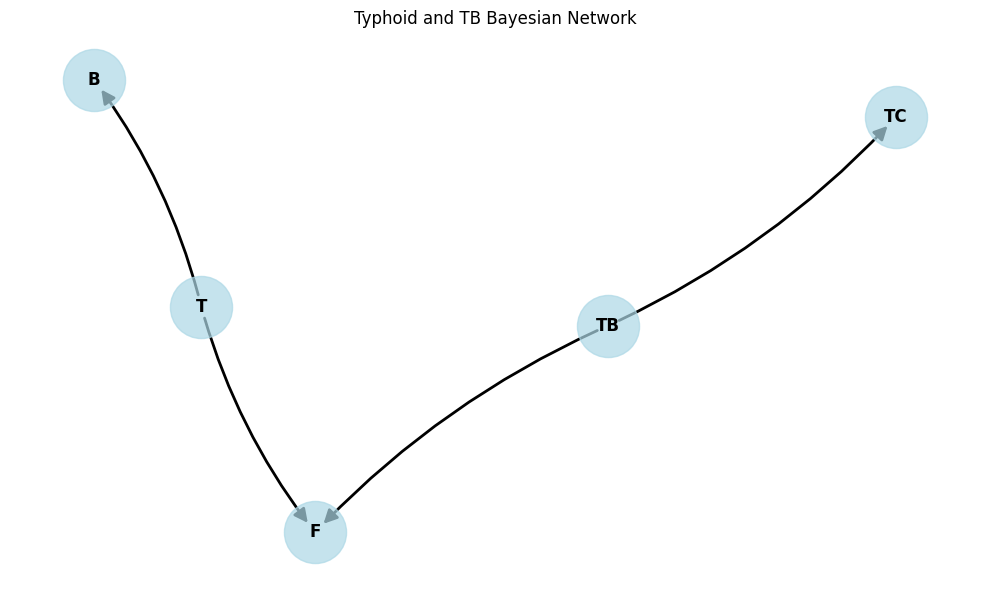


Bayesian Network Structure:
T (no parents)
TB (no parents)
F <- T, TB
B <- T
TC <- TB

Conditional Probability Tables:

CPT for TB:
P(TB=True) = 0.0100
P(TB=False) = 0.9900

CPT for T:
P(T=True) = 0.0010
P(T=False) = 0.9990

CPT for F:
P(F=True | T=False, TB=False) = 0.0150
P(F=True | T=True, TB=False) = 1.0000
P(F=True | T=False, TB=True) = 0.6000
P(F=True | T=True, TB=True) = 1.0000
P(F=False | T=False, TB=False) = 0.9850
P(F=False | T=False, TB=True) = 0.4000

CPT for TC:
P(TC=True | TB=False) = 0.0130
P(TC=True | TB=True) = 0.5800
P(TC=False | TB=False) = 0.9870
P(TC=False | TB=True) = 0.4200

CPT for B:
P(B=True | T=False) = 0.0005
P(B=True | T=True) = 0.4000
P(B=False | T=False) = 0.9995
P(B=False | T=True) = 0.6000

2. Variable Values:
All variables are binary (True/False)
T: Typhoid
TB: Tuberculosis
F: Fever
B: Bradycardia
TC: Tachycardia

4. Hypotheses:
1. Diseases are independent (no direct causal relationship between T and TB)
2. Symptoms are conditionally independent given

In [11]:
# Create the network
bn = create_typhoid_tb_network()

print("Exercise 1.4 - Typhoid and Tuberculosis Bayesian Network")

# 1. Network Structure and CPTs
print("\n1. Network Structure and CPTs:")
bn.plot_network("Typhoid and TB Bayesian Network")
bn.print_network(verbose=False)  # Only show non-zero probabilities

# 2. Variable values
print("\n2. Variable Values:")
print("All variables are binary (True/False)")
print("T: Typhoid")
print("TB: Tuberculosis")
print("F: Fever")
print("B: Bradycardia")
print("TC: Tachycardia")

# 3. Conditional probabilities are shown in the CPTs above

# 4. Hypotheses
print("\n4. Hypotheses:")
print("1. Diseases are independent (no direct causal relationship between T and TB)")
print("2. Symptoms are conditionally independent given their causes")
print("3. Fever follows an OR gate when both diseases are present")
print("4. Baseline rates apply when no disease is present")
print("\nThese hypotheses are reasonable because:")
print("- Diseases are independent in the general population")
print("- Symptoms are direct effects of the diseases")
print("- Fever is a common symptom that can be caused by either disease")
print("- Baseline rates represent the general population without either disease")

# 5. Diagnosis table
print("\n5. Diagnosis Table (showing two detailed calculations):")

# Example 1: Fever and Tachycardia
print("\nExample 1: Patient has Fever and Tachycardia")
symptoms = {'F': True, 'TC': True}
diagnosis = bn.diagnose(symptoms, verbose=True)  # Show detailed calculations

# Example 2: Fever and Bradycardia
print("\nExample 2: Patient has Fever and Bradycardia")
symptoms = {'F': True, 'B': True}
diagnosis = bn.diagnose(symptoms, verbose=True)  # Show detailed calculations

# 6. Association between Fever and Tachycardia in TB
print("\n6. Association between Fever and Tachycardia in TB:")
print("In our model, Fever and Tachycardia are conditionally independent given TB.")
print("This means that in TB patients, the presence of fever doesn't directly affect")
print("the probability of tachycardia. However, in reality, there might be a")
print("physiological connection between these symptoms in TB patients.")
print("\nTo model this association, we would need to:")
print("1. Add a direct edge between F and TC")
print("2. Create a new CPT for TC that depends on both TB and F")
print("3. Adjust the probabilities to reflect the observed association")
print("\nThis would make the model more accurate but also more complex.")

## Exercise 1.5

Imagine that we are in the 1960s or 1970s, when Bayesian networks had not yet been invented and the only probabilistic diagnostic method was the naïve Bayesian one. Solve the previous exercise, pointing out for each section the differences between this model and the Bayesian network.
